In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
df = pd.read_csv('data/loan_data_core.csv')
df.drop(['id', 'member_id', 'url', 'emp_title'], axis=1, inplace=True)

C:\Users\leero\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# converting columns where % charater is in every entry into a number

df['int_rate'] = df.int_rate.apply(lambda interest: interest[:len(interest)-1])
df['int_rate'] = pd.to_numeric(df['int_rate'])

df['revol_util'].fillna('0%', inplace=True)
df['revol_util'] = df['revol_util'].apply(
    lambda interest: interest[:len(interest)-1])
df['revol_util'] = pd.to_numeric(df['revol_util'])

In [4]:
grades = sorted(set(df.grade))

In [5]:
def percentage(feature):
    """Prints out number of samples, percent of total per loan grade A-G, t-stat, and p-value"""

    all_loans = df[feature].value_counts().sort_index()
    all_loan = df[feature].value_counts().sort_index()

    
    for letter in grades:
        grade_loan = df.loc[df.grade == letter][feature].value_counts().sort_index() / all_loan * 100
        all_loans = pd.concat([all_loans, grade_loan], axis=1)
        
    all_loans.columns = ['n_samples'] + grades

    all_loans.reset_index(inplace=True)
    
#    n_percent.fillna(0, inplace=True)
    
    return(all_loans)


def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [6]:
def object_graph(feature):
    """Makes a bar graph of a column complete with all it's features, each bar with show the its makeup as a percentage total
    and prints out the features with sample size and fail rate"""

    feature_interest = df[[feature]].dropna()

    x = sorted(list(set(feature_interest[feature])))
    y = [len(feature_interest.loc[feature_interest[feature] == i])/2507640*100 for i in x]
    
    plt.bar(x, y)

    plt.title(feature.upper())
    plt.ylabel('%')
    plt.xlabel(feature)
    plt.xticks(rotation=90)

    plt.show()
    print(percentage(feature))


def numeric_graph(feature):
    """Makes a graph of a numeric column by turn the data into a ECDF"""

    feature_interest = df[[feature, 'grade']].dropna()

    # A - G
    #lines for each loan grade is generated
    for letter in grades:
        grade_x, grade_y = ecdf(
            feature_interest.loc[feature_interest.grade == letter][feature])
        plt.plot(grade_x, grade_y, marker='.', linestyle='none', label=letter)

    # population
    pop_x, pop_y = ecdf(feature_interest[feature])
    plt.plot(pop_x, pop_y, marker='.', linestyle='none',
             color='black', label='All Grades')

    plt.title(feature.upper())
    plt.axis([np.percentile(pop_x, 2.5), np.percentile(pop_x, 97.5), 0, 1])
    plt.xlabel('Amounts')
    plt.ylabel('% cumulative')
    plt.legend(loc='best')

    plt.show()
    
    
    #creates data frame of loan_grade numeric description for all grades and the pop using the .describe() method
    
    df_description = feature_interest[feature].describe()
    
    for letter in grades:
        df_letter = feature_interest.loc[feature_interest.grade == letter][feature].describe()
        df_description = pd.concat([df_description,df_letter],axis =1)
        
    df_description.columns = ['All loans'] + grades
    print(df_description)

In [8]:
df.term = df.term.apply(lambda months: int(months[1:3]))

In [9]:
# random things of interest

df['collected'] = df.total_rec_int + df.total_rec_prncp
df['total_debt'] = df.term * df.installment

df['outstanding'] = df.total_debt - df.collected
df['outstanding_percent'] = df.outstanding / df.total_debt

df['princple_outstanding'] = df.loan_amnt - df.collected
df['princple_outstanding_percent'] = df.princple_outstanding/df.loan_amnt

df['effective_int_rate'] = (pow(df.int_rate/1200+1,12)-1) * 100


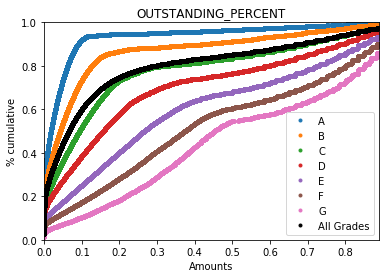

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean   1.814775e-01       0.058007       0.117454       0.199830   
std    2.664309e-01       0.143246       0.206873       0.262712   
min   -5.993235e+01     -11.400963      -2.292946      -8.087230   
25%    8.482456e-03       0.000790       0.003280       0.018625   
50%    6.537125e-02       0.017758       0.042178       0.093561   
75%    2.024825e-01       0.052340       0.105433       0.220589   
max    1.000000e+00       1.000000       1.000000       1.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean        0.272195       0.361507      0.439418      0.512040  
std         0.293344       0.369174      0.313488      0.305898  
min        -3.419800     -59.932353     -0.223149     -0.497929  
25%         0.039561       0.099525      0.172481      0.

In [10]:
numeric_graph('outstanding_percent')

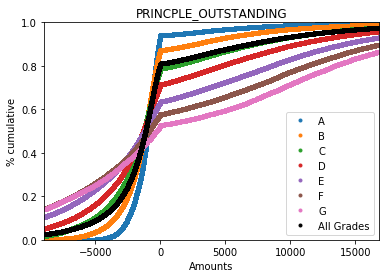

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean  -2.019434e+02    -720.757748    -607.119176    -196.797339   
std    5.797293e+03    2597.506725    3967.614804    5773.230985   
min   -2.794899e+04   -6459.490000  -13907.620000  -17667.020000   
25%   -2.470800e+03   -1636.250000   -2183.160000   -2832.860000   
50%   -1.135190e+03    -932.440000   -1167.330000   -1266.340000   
75%   -2.528975e+02    -449.810000    -444.330000    -176.800000   
max    4.000000e+04   40000.000000   40000.000000   40000.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean      246.416910     854.475218   1614.096951   2787.400366  
std      7320.539871    9316.598819  10933.933334  11955.869058  
min    -21174.700000  -25053.600000 -27412.690000 -27948.990000  
25%     -3509.710000   -4596.400000  -5299.790000  -5036.

In [11]:
numeric_graph('princple_outstanding')

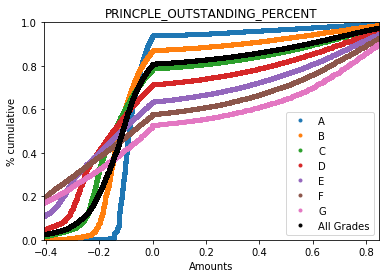

          All loans              A              B              C  \
count  2.507640e+06  434114.000000  731908.000000  711534.000000   
mean  -2.031440e-02      -0.050149      -0.046621      -0.017204   
std    3.161487e-01       0.158196       0.245011       0.330942   
min   -8.088975e-01      -0.253170      -0.401212      -0.512858   
25%   -1.878848e-01      -0.111000      -0.165372      -0.214175   
50%   -1.138131e-01      -0.087797      -0.127275      -0.144746   
75%   -3.430625e-02      -0.053304      -0.060585      -0.025718   
max    1.000000e+00       1.000000       1.000000       1.000000   

                   D              E             F             G  
count  374050.000000  177466.000000  61314.000000  17254.000000  
mean        0.007201       0.042527      0.074269      0.138996  
std         0.393972       0.453888      0.504939      0.526788  
min        -0.623628      -0.715817     -0.798817     -0.808897  
25%        -0.268601      -0.311261     -0.347420     -0.

In [12]:
numeric_graph('princple_outstanding_percent')